In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\user\AppData\Local\Temp\ipykernel_16340\1825103310.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('D:/GitHub/spara_ml/wine_info.csv')

In [3]:
df.head()

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0
2,137199,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,750.0
3,137200,Baron du Val White,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,NaN,NaN,750.0
4,137201,"Benziger, Cabernet Sauvignon",벤지거 Benziger,미국 U.S.A,캘리포니아 California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,NaN,2003.0,750.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21605 non-null  int64  
 1   name         21605 non-null  object 
 2   producer     21605 non-null  object 
 3   nation       21605 non-null  object 
 4   local1       20713 non-null  object 
 5   local2       11146 non-null  object 
 6   local3       3595 non-null   object 
 7   local4       2 non-null      object 
 8   varieties1   21256 non-null  object 
 9   varieties2   7518 non-null   object 
 10  varieties3   4028 non-null   object 
 11  varieties4   1330 non-null   object 
 12  varieties5   379 non-null    object 
 13  varieties6   105 non-null    object 
 14  varieties7   31 non-null     object 
 15  varieties8   18 non-null     object 
 16  varieties9   7 non-null      object 
 17  varieties10  6 non-null      object 
 18  varieties11  5 non-null      object 
 19  vari

In [5]:
print(pd.unique(df["type"]))

['Red' 'White' 'Rose' nan 'Fortified' 'Sparkling' 'Etc' 'Hard' 'Korean'
 'Sake/Rice']


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe(include='all')

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
count,21605.000000,21605,21605,21605,20713,11146,3595,2,21256,7518,4028,1330,379,105,31,18,7,6,5,4,21547,21591,14459,14460,21603,21592,21592,21592,1.251200e+04,19004.000000,21471.000000
unique,NaN,21531,4825,33,214,282,163,1,352,281,208,144,84,46,27,15,7,6,5,4,9,12,184,81,5,5,5,5,NaN,NaN,NaN
top,NaN,Chateau Bel Air,루이 자도 Louis Jadot,프랑스 France,부르고뉴 Bourgogne,꼬뜨 드 뉘 Cote de Nuits,나파 밸리 Napa Valley,Ugni​ blanc,Cabernet Sauvignon,Merlot,Cabernet Franc,Petit Verdot,Petit Verdot,Petit Verdot,Pinot Noir,Souzao,Carignan,Cabernet Franc,Tannat,Etc,Red,Table,13.5,16~18,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN
freq,NaN,4,84,6949,2493,997,691,2,2816,1221,691,218,47,10,2,3,1,1,1,1,13853,17907,1825,6295,18995,11081,9023,7568,NaN,NaN,NaN
mean,153998.163666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600060e+05,2012.195275,748.541894
std,9200.852348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.146727e+05,4.962949,133.168071
min,137197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1967.000000,100.000000
25%,146645.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2008.000000,750.000000
50%,153748.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2013.000000,750.000000
75%,162431.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2016.000000,750.000000


In [7]:
missing_price_count = df['price'].isnull().sum()
print(f'price 컬럼의 결측치 개수: {missing_price_count}')

price 컬럼의 결측치 개수: 9093


In [8]:
min_price = df['price'].min()
print("Price 컬럼의 최솟값:", min_price)


Price 컬럼의 최솟값: 3900.0


df1생성 =df에서 price 없는 행 지움

In [9]:
# price,ml 컬럼에 결측치가 없는 행들로 새로운 데이터프레임 생성
df1 = df.dropna(subset=['price']).copy()
df1= df1.dropna(subset=['ml'])
# 결과 확인
df1.head()

#df1['price'].isnull().sum() 으로 잘만들어진것 확인


,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0
7,137204,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,Merlot,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,750.0
8,137205,"Calvet, Bordeaux white",깔베 Calvet,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,Sauvignon blanc,Semillon,Muscadet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,Table,11.5,9~11,SWEET1,ACIDITY4,BODY2,TANNIN1,21000.0,2010.0,750.0
9,137207,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,프랑스 France,서던 프랑스 Southern France,랑그독 루씨용 Languedoc Roussillon,NaN,NaN,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,19000.0,2017.0,750.0


In [10]:
df1['price/100ml'] = (df1['price'] / df1['ml'])*100
df1['price/100ml'] = round(df1['price/100ml'])


df1.head(5)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0,29333.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0,14667.0
7,137204,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,Merlot,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,750.0,2800.0
8,137205,"Calvet, Bordeaux white",깔베 Calvet,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,Sauvignon blanc,Semillon,Muscadet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,Table,11.5,9~11,SWEET1,ACIDITY4,BODY2,TANNIN1,21000.0,2010.0,750.0,2800.0
9,137207,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,프랑스 France,서던 프랑스 Southern France,랑그독 루씨용 Languedoc Roussillon,NaN,NaN,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,19000.0,2017.0,750.0,2533.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12451 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           12451 non-null  int64  
 1   name         12451 non-null  object 
 2   producer     12451 non-null  object 
 3   nation       12451 non-null  object 
 4   local1       11996 non-null  object 
 5   local2       6540 non-null   object 
 6   local3       2263 non-null   object 
 7   local4       1 non-null      object 
 8   varieties1   12285 non-null  object 
 9   varieties2   4411 non-null   object 
 10  varieties3   2410 non-null   object 
 11  varieties4   798 non-null    object 
 12  varieties5   229 non-null    object 
 13  varieties6   70 non-null     object 
 14  varieties7   22 non-null     object 
 15  varieties8   10 non-null     object 
 16  varieties9   4 non-null      object 
 17  varieties10  4 non-null      object 
 18  varieties11  3 non-null      object 
 19  varieties

In [12]:
df1.describe(include='all')

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
count,12451.000000,12451,12451,12451,11996,6540,2263,1,12285,4411,2410,798,229,70,22,10,4,4,3,2,12427,12444,8428,8427,12449,12451,12451,12451,1.245100e+04,11069.000000,12451.000000,1.245100e+04
unique,NaN,12427,3137,28,178,249,145,1,290,229,169,107,61,36,21,9,4,4,3,2,7,11,148,73,5,5,5,5,NaN,NaN,NaN,NaN
top,NaN,Cellier des Dauphins Prestige Red,테스코 파이니스트 Tesco Finest,프랑스 France,캘리포니아 California,꼬뜨 드 뉘 Cote de Nuits,나파 밸리 Napa Valley,Ugni​ blanc,Pinot Noir,Merlot,Cabernet Franc,Petit Verdot,Petit Verdot,Petit Verdot,Syrah & Shiraz,Souzao,Petit Verdot,Cabernet Franc,Tannat,Etc,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN,NaN
freq,NaN,2,66,3926,1560,644,486,1,1729,712,401,149,30,7,2,2,1,1,1,1,7907,10190,1068,3680,10993,6289,5158,4439,NaN,NaN,NaN,NaN
mean,154091.654727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.598616e+05,2012.357395,746.525500,2.145701e+04
std,8934.488564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.151377e+05,4.974603,134.421382,4.109901e+04
min,137197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1976.000000,100.000000,6.530000e+02
25%,147002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2009.000000,750.000000,5.333000e+03
50%,154018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2014.000000,750.000000,1.000000e+04
75%,162133.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2017.000000,750.000000,2.186700e+04


In [13]:
#sweet에 null값인 행확인
rows_with_null_sweet = df1[df1['sweet'].isnull()]
rows_with_null_sweet
#카스텔로 디 멜레토, 비냐 카시 키안티 클라시코 리제르바 2016 당도 1정도인듯
#https://www.wine21.com/13_search/wine_view.html?Idx=146430
#라르카, 프리미티보 풀리아 2020 당도 1정도인듯
#https://www.wine21.com/13_search/wine_view.html?Idx=168444


,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
21247,168337,"Meleto, Vigna Casi Chianti Classico Riserva",카스텔로 디 멜레토 Castello di Meleto,이탈리아 Italy,토스카나 Toscana,키안티 Chianti,NaN,NaN,Sangiovese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13.5,16~18,NaN,ACIDITY4,BODY4,TANNIN3,42000.0,2016.0,750.0,5600.0
21347,168443,"L’Arca, Negroamaro Puglia",라르카 L'Arca,이탈리아 Italy,뿔리아 Puglia,NaN,NaN,NaN,Negroamaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,NaN,ACIDITY3,BODY4,TANNIN3,35000.0,2020.0,750.0,4667.0


sweet, acidity, body, tannin 같은거 null값이면 1로 대체하는것도 나쁘지 않을듯

In [14]:
#type에 null값인거 확인 
rows_with_null_type = df1[df1['type'].isnull()]
rows_with_null_type
#뽀르카 드 무르샤 리제르바 2013 레드와인이었음 https://www.wine21.com/13_search/wine_view.html?Idx=138451
#Armagnac de Montal, Exclusive VSOP 고도주와인이라는데 hard로 들어가야할듯?
#치아치 피꼴로미니 다라고나, 몬테쿠꼬 2006 레드와인이었음
#군트하이머, 베르그클로스터 아이스바인 화이트와인이었음


,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
671,138451,Porca de Murca Reserva,포르카 데 무르카 Porca de Murca,포르투갈 Portugal,도우루 Douro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,14,17~19,SWEET1,ACIDITY3,BODY4,TANNIN3,54000.0,2013.0,750.0,7200.0
683,138474,"Armagnac de Montal, Exclusive VSOP",아르마냑 드 몽탈 Armagnac de Montal,프랑스 France,아르마냑 Armagnac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dessert,NaN,NaN,SWEET1,ACIDITY1,BODY5,TANNIN1,89000.0,NaN,750.0,11867.0
1721,140001,"Ciacci Piccolomini d'Aragona, Montecucco",치아치 피꼴로미니 다라고나 Ciacci Piccolomini d'Aragona,이탈리아 Italy,토스카나 Toscana,마렘마 Maremma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,13.5,16~18,SWEET1,ACIDITY3,BODY4,TANNIN3,68000.0,2006.0,750.0,9067.0
2414,141204,"Gundheimer, Bergkloster Eiswein",군트하이머 Gundheimer,독일 Germany,라인헤센 Rheinhessen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dessert,NaN,NaN,SWEET5,ACIDITY2,BODY2,TANNIN1,61000.0,2004.0,375.0,16267.0
3344,143177,Chateau Joinin,샤또 삐뽀 Chateau Pipeau,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,SWEET1,ACIDITY3,BODY3,TANNIN3,45000.0,2016.0,750.0,6000.0
3421,143359,"Alexander, La Poire",알렉산더 Alexander,이탈리아 Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dessert,38,14~16,SWEET1,ACIDITY1,BODY5,TANNIN1,180000.0,NaN,500.0,36000.0
3658,143908,Chateau Mareil,샤또 마레이 Chateau Mareil,프랑스 France,보르도 Bordeaux,메독 Medoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,SWEET1,ACIDITY3,BODY3,TANNIN3,50000.0,2002.0,750.0,6667.0
12362,156117,"Sine Qua Non, In the Abstract",씨네 쿼 넌 Sine Qua Non,미국 U.S.A,캘리포니아 California,나파 카운티 Napa County,나파 밸리 Napa Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,SWEET1,ACIDITY3,BODY4,TANNIN1,130000.0,2012.0,750.0,17333.0
12365,156123,Amuse Bouche Le bar a Vin,아뮤즈 부셰 Amuse Bouche,미국 U.S.A,캘리포니아 California,나파 카운티 Napa County,나파 밸리 Napa Valley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table,NaN,NaN,SWEET1,ACIDITY3,BODY5,TANNIN4,1360000.0,2012.0,750.0,181333.0
12398,156188,Canard Duchene Authentic Vintage,까나르 뒤센 Canard Duchene,프랑스 France,샹파뉴 Champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appetizer,12,6~8,SWEET1,ACIDITY5,BODY5,TANNIN1,150000.0,2005.0,750.0,20000.0


type이 null 값인거 producer나 varieties1 동일한 와인의 타입을 따라가는 것이 좋을 것 같음
producer가 null값인게 없어서 producer 따라가는것도 좋을듯 이라고 생각했는데 아래결과보니까 
red로 넣거나 지워버려야될듯


In [15]:
#df로 producer확인해보기
# producer가 'Gundheimer'인 행 선택
filtered_df = df[df['producer'].str.contains('Gundheimer')]

# 결과 확인
filtered_df

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
2414,141204,"Gundheimer, Bergkloster Eiswein",군트하이머 Gundheimer,독일 Germany,라인헤센 Rheinhessen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dessert,NaN,NaN,SWEET5,ACIDITY2,BODY2,TANNIN1,61000.0,2004.0,375.0


결측치 개수 확인 : nation, type, sweet, acidity, body, tannin 

In [16]:
missing_nation_count = df1['nation'].isnull().sum()
print(f'nation 컬럼의 결측치 개수: {missing_nation_count}')

missing_type_count = df1['type'].isnull().sum()
print(f'type 컬럼의 결측치 개수: {missing_type_count}')

missing_sweet_count = df1['sweet'].isnull().sum()
print(f'sweet 컬럼의 결측치 개수: {missing_sweet_count}')

missing_acidity_count = df1['acidity'].isnull().sum()
print(f'acidity 컬럼의 결측치 개수: {missing_acidity_count}')

missing_body_count = df1['body'].isnull().sum()
print(f'body 컬럼의 결측치 개수: {missing_body_count}')

missing_tannin_count = df1['tannin'].isnull().sum()
print(f'tannin 컬럼의 결측치 개수: {missing_tannin_count}')

nation 컬럼의 결측치 개수: 0
type 컬럼의 결측치 개수: 24
sweet 컬럼의 결측치 개수: 2
acidity 컬럼의 결측치 개수: 0
body 컬럼의 결측치 개수: 0
tannin 컬럼의 결측치 개수: 0


In [17]:
print(pd.unique(df1["type"]))

['Red' 'White' 'Rose' 'Sparkling' 'Etc' 'Fortified' 'Hard' nan]


In [18]:
# type 컬럼에 결측치가 없는 행들로 새로운 데이터프레임 생성
df2 = df1.dropna(subset=['type']).copy()


In [19]:
mode_value = df['sweet'].mode()[0] 
df2['sweet'].fillna(mode_value, inplace=True)
df2['sweet'].isnull().sum()


C:\Users\user\AppData\Local\Temp\ipykernel_16340\1699025256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['sweet'].fillna(mode_value, inplace=True)


0

In [20]:
# print(pd.unique(df2["sweet"]))
df2["sweet"].isnull().sum()

0

In [21]:
df2.describe(include='all')

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
count,12427.000000,12427,12427,12427,11978,6534,2260,1,12285,4411,2410,798,229,70,22,10,4,4,3,2,12427,12420,8414,8413,12427,12427,12427,12427,1.242700e+04,11055.000000,12427.000000,1.242700e+04
unique,NaN,12403,3129,28,177,249,145,1,290,229,169,107,61,36,21,9,4,4,3,2,7,11,148,72,5,5,5,5,NaN,NaN,NaN,NaN
top,NaN,Cellier des Dauphins Prestige Red,테스코 파이니스트 Tesco Finest,프랑스 France,캘리포니아 California,꼬뜨 드 뉘 Cote de Nuits,나파 밸리 Napa Valley,Ugni​ blanc,Pinot Noir,Merlot,Cabernet Franc,Petit Verdot,Petit Verdot,Petit Verdot,Syrah & Shiraz,Souzao,Petit Verdot,Cabernet Franc,Tannat,Etc,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN,NaN
freq,NaN,2,66,3919,1556,644,483,1,1729,712,401,149,30,7,2,2,1,1,1,1,7907,10176,1067,3678,10975,6276,5149,4427,NaN,NaN,NaN,NaN
mean,154088.543253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.596663e+05,2012.359566,746.629436,2.142926e+04
std,8931.794144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.137103e+05,4.974876,134.413049,4.090279e+04
min,137197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1976.000000,100.000000,6.530000e+02
25%,147006.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2009.000000,750.000000,5.333000e+03
50%,154012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2014.000000,750.000000,1.000000e+04
75%,162130.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2017.000000,750.000000,2.186700e+04


인코딩하기: nation, type, sweet, acidity, body, tannin
레이블 인코딩: sweet, acidity, body, tannin
원샷 인코딩:type, 
nation은 뭘로 인코딩??

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

In [23]:
# le.fit(df2[['sweet']])
# le.fit(df2[['acidity']])
# le.fit(df2[['body']])
# le.fit(df2[['tannin']])
# df2['sweet_le'] = le.transform(df2[['sweet']])
# df2['acidity_le'] = le.transform(df2[['acidity']])
# df2['body_le'] = le.transform(df2[['body']])
# df2['tannin_le'] = le.transform(df2[['tannin']])
#이런식으로 이어서 쓰면 코드 오류남


In [24]:
le.fit(df2['sweet'].unique())
df2['sweet_le'] = le.transform(df2['sweet'])

le.fit(df2['acidity'].unique())
df2['acidity_le'] = le.transform(df2[['acidity']])

le.fit(df2['body'].unique())
df2['body_le'] = le.transform(df2[['body']])

le.fit(df2['tannin'].unique())
df2['tannin_le'] = le.transform(df2[['tannin']])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [25]:
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='sweet', ylabel='price/100ml'>

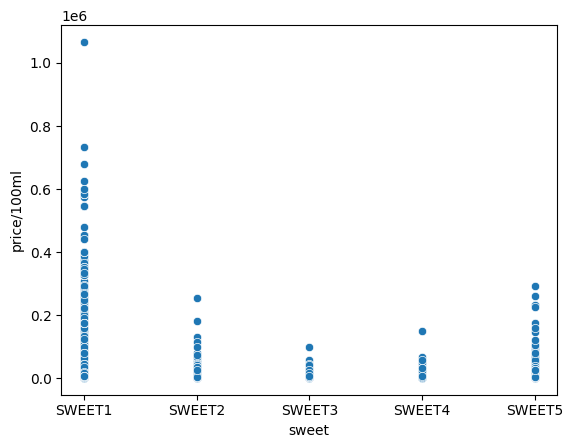

In [26]:
sns.scatterplot(df2, x = 'sweet',y = 'price/100ml')

In [29]:
X = df2[['sweet_le','acidity_le','body_le','tannin_le']]
y= df2[['price/100ml']]
model_lor = LogisticRegression()
model_lor.fit(X,y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model_lor.predict(X)
y_pred[:10]

array([33333., 10667.,  4000.,  4667.,  4000.,  4667.,  4667.,  8000.,
        6667.,  4667.])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred))

In [36]:
get_metrics(y, y_pred)

정확도 0.033797376679810094


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].